**Importing modules and loading the data**

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [7]:
df = pd.read_excel('Concrete_Data.xls')

In [8]:
df.shape

(1030, 9)

In [9]:
df.head()

Cement (component 1)(kg in a m^3 mixture)  \
0                                      540.0   
1                                      540.0   
2                                      332.5   
3                                      332.5   
4                                      198.6   

   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  \
0                                                0.0       
1                                                0.0       
2                                              142.5       
3                                              142.5       
4                                              132.4       

   Fly Ash (component 3)(kg in a m^3 mixture)  \
0                                         0.0   
1                                         0.0   
2                                         0.0   
3                                         0.0   
4                                         0.0   

   Water  (component 4)(kg in a m^3 mixture)  \
0                                      162.0   
1                                      162.0   
2                                      228.0   
3                                      228.0   
4                                      192.0   

   Superplasticizer (component 5)(kg in a m^3 mixture)  \
0                                                2.5     
1                                                2.5     
2                                                0.0     
3                                                0.0     
4                                                0.0     

   Coarse Aggregate  (component 6)(kg in a m^3 mixture)  \
0                                             1040.0      
1                                             1055.0      
2                                              932.0      
3                                              932.0      
4                                              978.4      

   Fine Aggregate (component 7)(kg in a m^3 mixture)  Age (day)  \
0                                              676.0         28   
1                                              676.0         28   
2                                              594.0        270   
3                                              594.0        365   
4                                              825.5        360   

   Concrete compressive strength(MPa, megapascals)   
0                                         79.986111  
1                                         61.887366  
2                                         40.269535  
3                                         41.052780  
4                                         44.296075

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   Cement (component 1)(kg in a m^3 mixture)              1030 non-null   float64
 1   Blast Furnace Slag (component 2)(kg in a m^3 mixture)  1030 non-null   float64
 2   Fly Ash (component 3)(kg in a m^3 mixture)             1030 non-null   float64
 3   Water  (component 4)(kg in a m^3 mixture)              1030 non-null   float64
 4   Superplasticizer (component 5)(kg in a m^3 mixture)    1030 non-null   float64
 5   Coarse Aggregate  (component 6)(kg in a m^3 mixture)   1030 non-null   float64
 6   Fine Aggregate (component 7)(kg in a m^3 mixture)      1030 non-null   float64
 7   Age (day)                                              1030 non-null   int64  
 8   Concrete compressive strength(MPa, megapascals)  

Thankfully data does not contain any missing values. However, the field titles are overly descriptive for our purposes so let's rename them to be more succinct.

In [22]:
updated_col_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
                     'Coarse Aggregrate', 'Fine Aggregate', 'Age', 'Compressive Strength']

df.columns = updated_col_names

**Exploratory Data Analysis**

In [23]:
df.describe()

Cement  Blast Furnace Slag      Fly Ash        Water  \
count  1030.000000         1030.000000  1030.000000  1030.000000   
mean    281.165631           73.895485    54.187136   181.566359   
std     104.507142           86.279104    63.996469    21.355567   
min     102.000000            0.000000     0.000000   121.750000   
25%     192.375000            0.000000     0.000000   164.900000   
50%     272.900000           22.000000     0.000000   185.000000   
75%     350.000000          142.950000   118.270000   192.000000   
max     540.000000          359.400000   200.100000   247.000000   

       Superplasticizer  Coarse Aggregrate  Fine Aggregate          Age  \
count       1030.000000        1030.000000     1030.000000  1030.000000   
mean           6.203112         972.918592      773.578883    45.662136   
std            5.973492          77.753818       80.175427    63.169912   
min            0.000000         801.000000      594.000000     1.000000   
25%            0.000000         932.000000      730.950000     7.000000   
50%            6.350000         968.000000      779.510000    28.000000   
75%           10.160000        1029.400000      824.000000    56.000000   
max           32.200000        1145.000000      992.600000   365.000000   

       Compressive Strength  
count           1030.000000  
mean              35.817836  
std               16.705679  
min                2.331808  
25%               23.707115  
50%               34.442774  
75%               46.136287  
max               82.599225

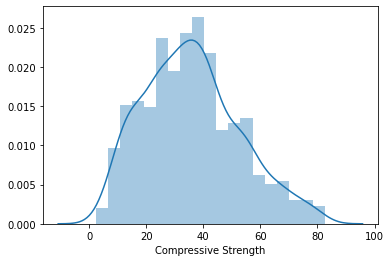

In [57]:
sns.distplot(df['Compressive Strength'])

As our target variable is Compressive Strength, it makes sense to plot the distribution.  

The distribution looks close to normal which is a positive sign.

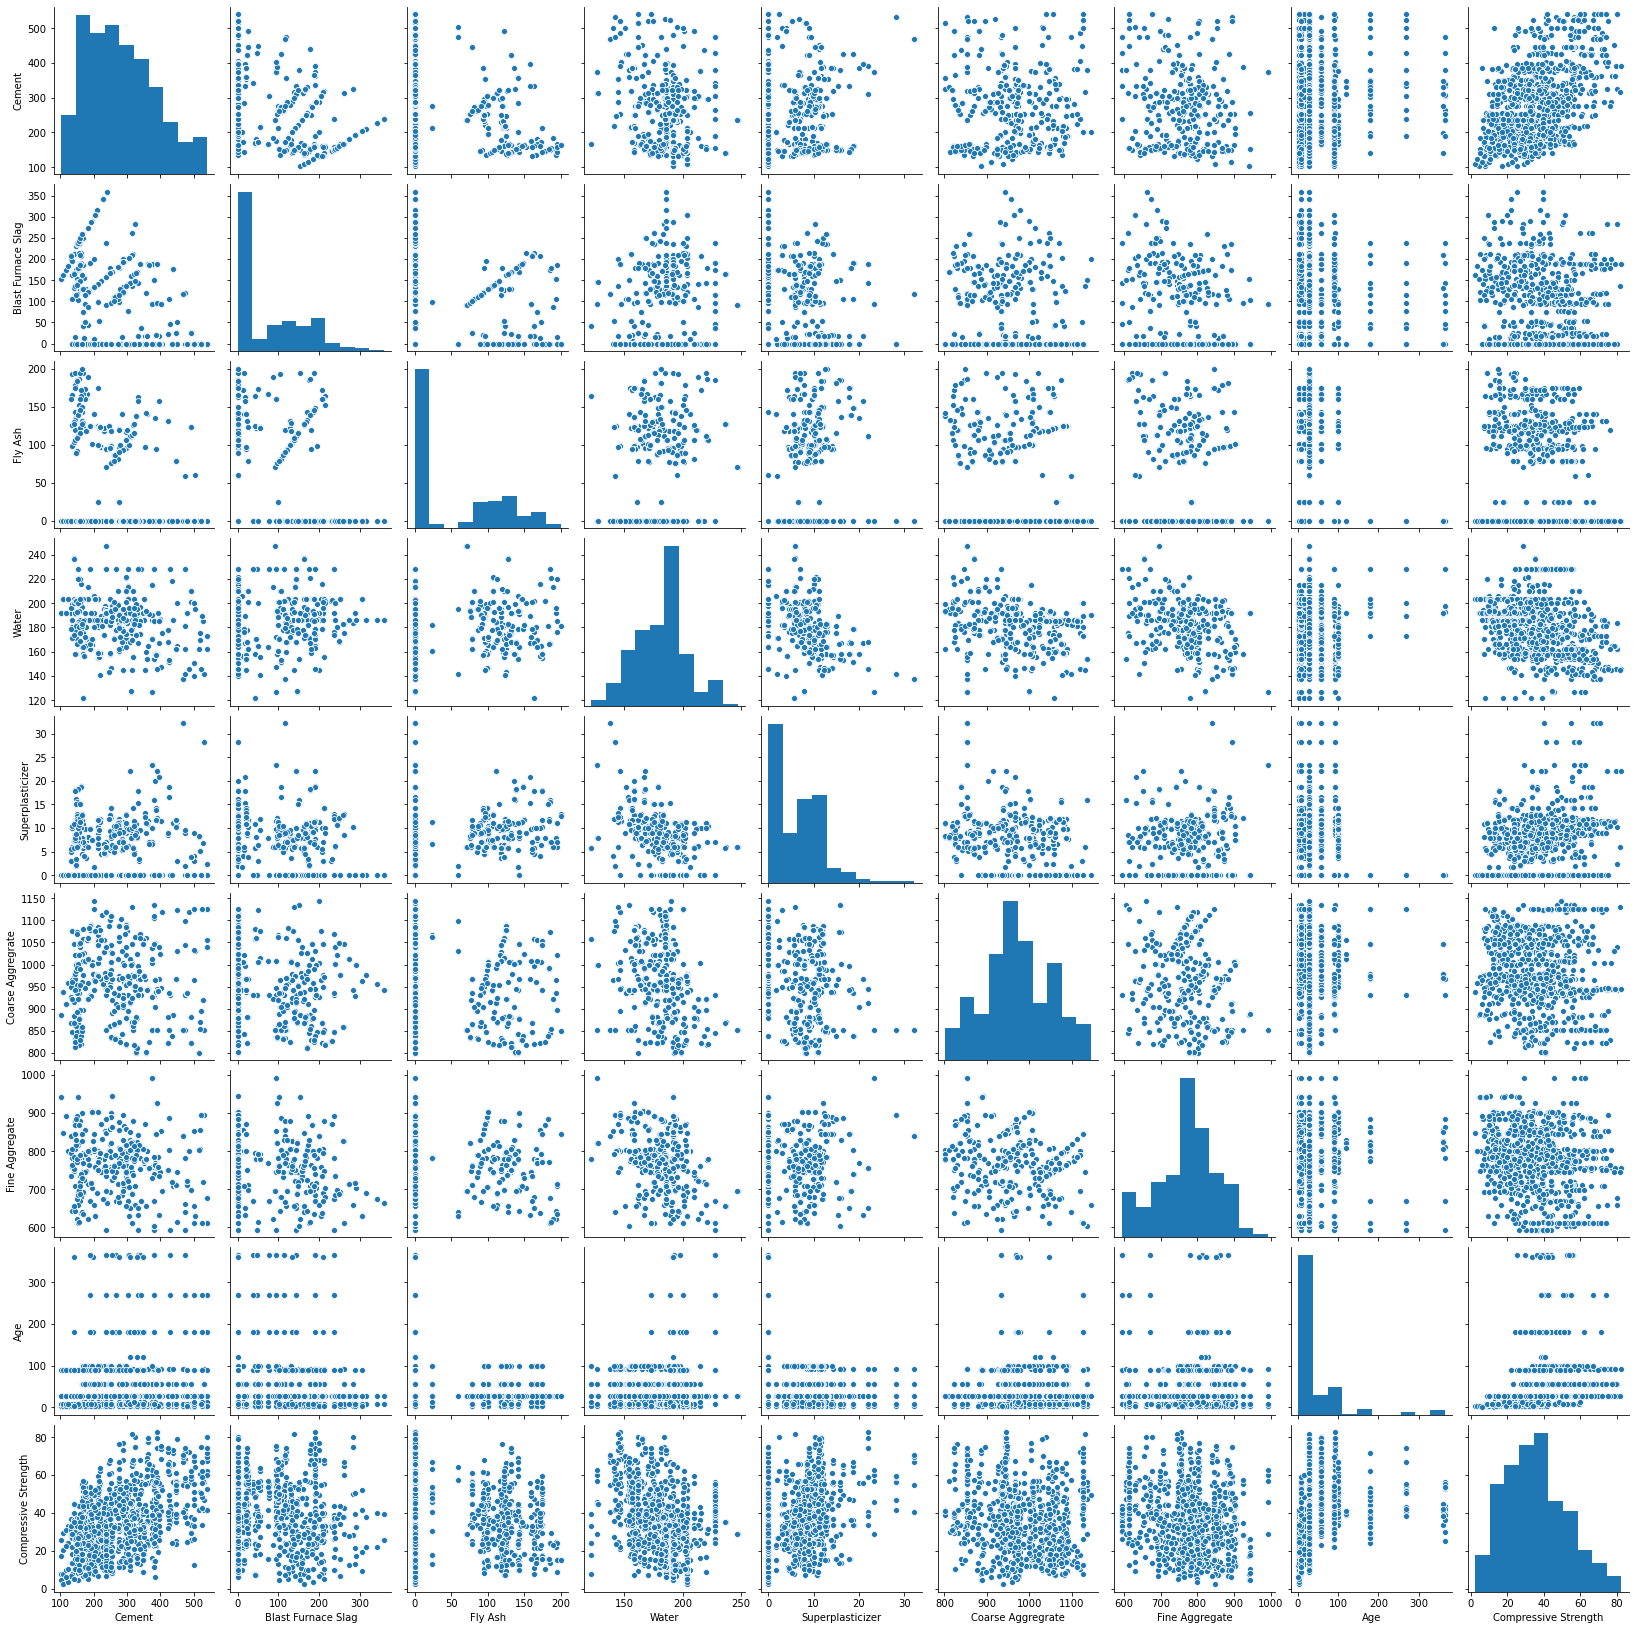

In [37]:
sns.pairplot(df)
plt.show()

At first glance, there doesn't seem to be any high correlation between any 2 features. Although Cement and Compressive Strength look like they may have some correlation. Let's determine the Pearson Correlation coefficients for these features and see if we're correct.

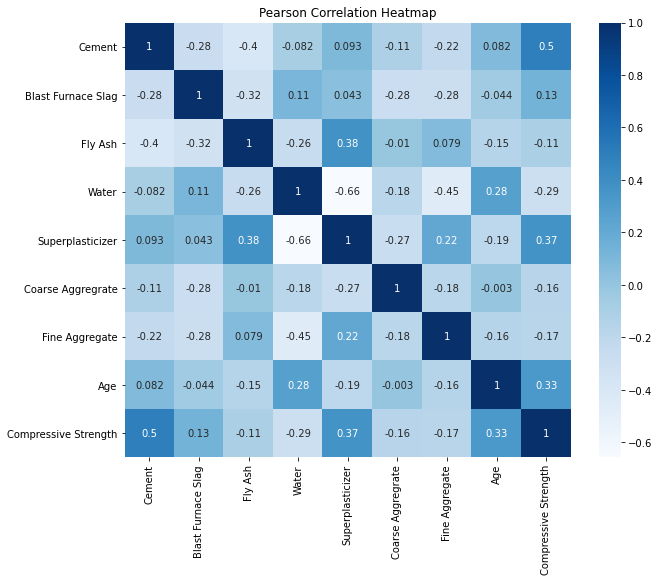

In [39]:
corr = df.corr()

plt.figure(figsize = (10,8))
sns.heatmap(corr, cmap = 'Blues', annot = True)
plt.title('Pearson Correlation Heatmap')
plt.show()

In [52]:
corr_sorted = corr.unstack().sort_values(kind='quicksort', ascending = False)

In [58]:
print(corr_sorted[corr_sorted!=1].head(10))
print(corr_sorted[corr_sorted!=1].tail(10))

Cement                Compressive Strength    0.497833
Compressive Strength  Cement                  0.497833
Fly Ash               Superplasticizer        0.377340
Superplasticizer      Fly Ash                 0.377340
                      Compressive Strength    0.366102
Compressive Strength  Superplasticizer        0.366102
Age                   Compressive Strength    0.328877
Compressive Strength  Age                     0.328877
Water                 Age                     0.277604
Age                   Water                   0.277604
dtype: float64
Compressive Strength  Water                  -0.289613
Water                 Compressive Strength   -0.289613
Blast Furnace Slag    Fly Ash                -0.323569
Fly Ash               Blast Furnace Slag     -0.323569
                      Cement                 -0.397475
Cement                Fly Ash                -0.397475
Fine Aggregate        Water                  -0.450635
Water                 Fine Aggregate         -0.45

* As expected, there aren't any high correlations between **Compressive Strength** and other features, except for **Cement** with a correlation of almost 0.5.
* Other pairs with close to 0.4 correlation are **Fly Ash / Superplasticizer** and **Compressive Strength / Superplasticizer**.
* On the bottom end of the scale we have **Water / Superplasticizer** with a very negative correlation of 0.66.

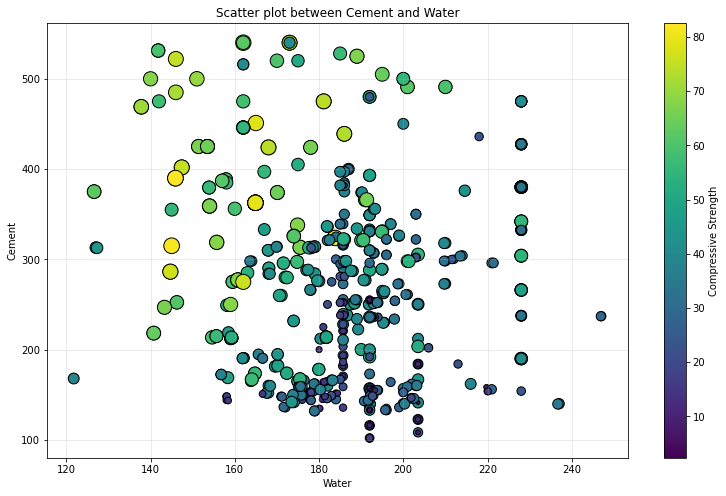

In [62]:
fig, ax=plt.figure(figsize=(13,8))
ax=fig.add_subplot(111)
plt.scatter(df["Water"],df["Cement"],
           c=df["Compressive Strength"],s=df["Compressive Strength"]*3,
           linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("Water")
ax.set_ylabel("Cement")
lab = plt.colorbar()
lab.set_label("Compressive Strength")
plt.title("Scatter plot between Cement and Water")
plt.grid(True,alpha=.3)
plt.show()